In [1]:
import pandas as pd

In [2]:
df1 = pd.read_csv(r'D:\Mlops-ML\Gemstone-ML\data\train.csv')
df2 = pd.read_csv(r'D:\Mlops-ML\Gemstone-ML\data\test.csv')

In [3]:
df = pd.concat([df1, df2], ignore_index=True)

In [10]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [11]:
df.to_csv(r'D:\Mlops-ML\Gemstone-ML\data\gemstone_data.csv',index=False)

In [12]:
df=pd.read_csv(r'D:\Mlops-ML\Gemstone-ML\data\gemstone_data.csv')

In [26]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619.0
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387.0
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772.0
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666.0
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453.0


In [5]:
df.isnull().sum()

id              0
carat           0
cut             0
color           0
clarity         0
depth           0
table           0
x               0
y               0
z               0
price      129050
dtype: int64

In [29]:
df.shape

(322623, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322623 entries, 0 to 322622
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       322623 non-null  int64  
 1   carat    322623 non-null  float64
 2   cut      322623 non-null  object 
 3   color    322623 non-null  object 
 4   clarity  322623 non-null  object 
 5   depth    322623 non-null  float64
 6   table    322623 non-null  float64
 7   x        322623 non-null  float64
 8   y        322623 non-null  float64
 9   z        322623 non-null  float64
 10  price    193573 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 27.1+ MB


In [62]:
df.dropna(inplace=True)

In [63]:
df.drop(columns=['id'],inplace=True)

In [9]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619.0
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387.0
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772.0
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666.0
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453.0


In [10]:
df.duplicated().sum()

0

In [26]:
cat_columns=[feature for feature in df.columns if df[feature].dtype=='O']
cat_columns

['cut', 'color', 'clarity']

In [27]:
num_columns=[feature for feature in df.columns if df[feature].dtype!='O']
num_columns

['carat', 'depth', 'table', 'x', 'y', 'z', 'price']

In [13]:
df[cat_columns].describe()

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [14]:
df[num_columns].describe()

,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [15]:
for c in cat_columns:
    print(df[c].value_counts())
    print("=======================")

Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: cut, dtype: int64
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: color, dtype: int64
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: clarity, dtype: int64


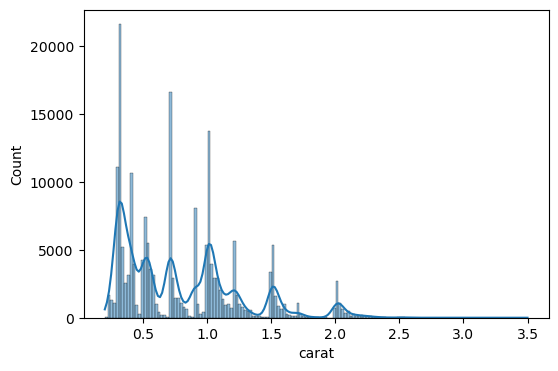

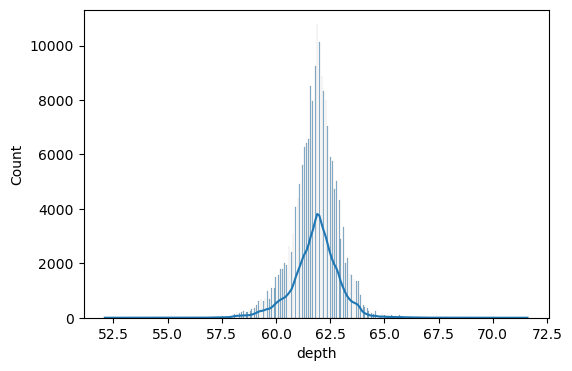

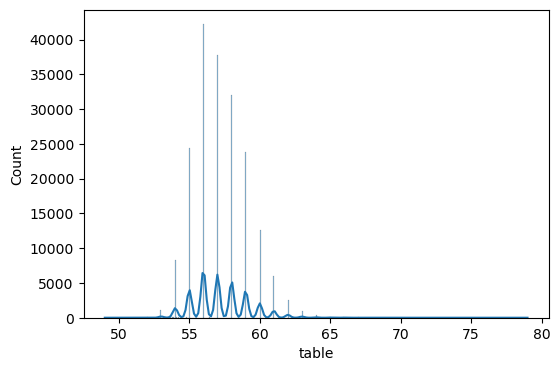

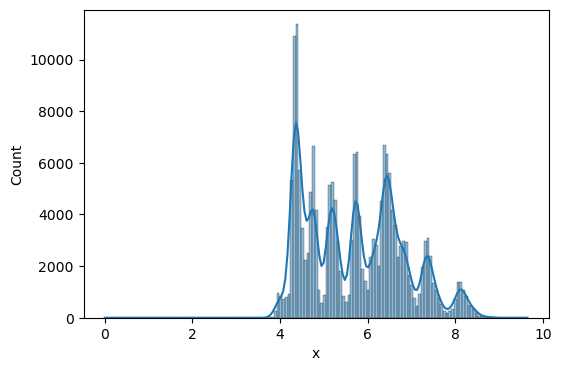

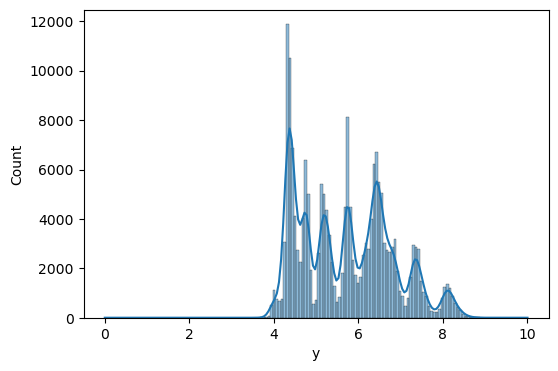

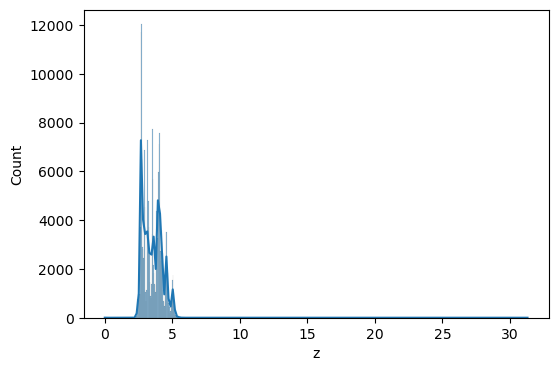

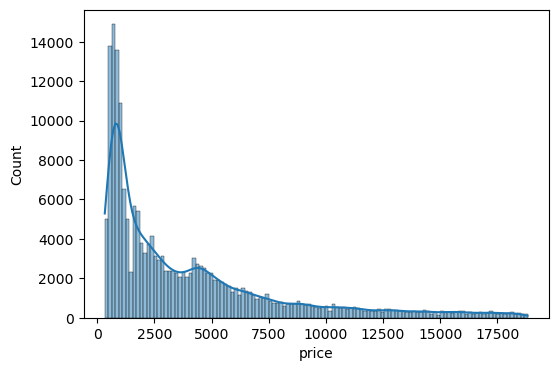

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt 

for c in num_columns:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df,x=c,kde=True)


<Axes: >

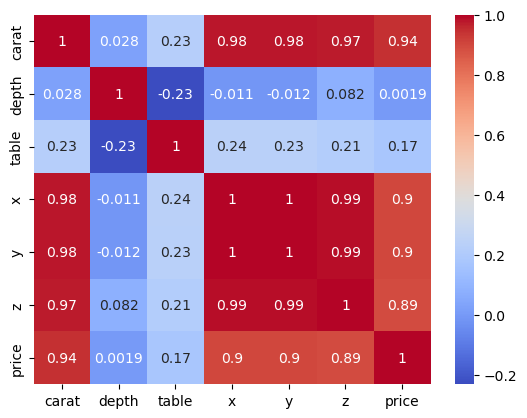

In [61]:
sns.heatmap(df[num_columns].corr(),annot=True,cmap='coolwarm')

In [66]:
df[cat_columns]

,cut,color,clarity
0,Premium,F,VS2
1,Very Good,J,SI2
2,Ideal,G,VS1
3,Ideal,G,VS1
4,Premium,G,VS2
...,...,...,...
193568,Ideal,D,VVS2
193569,Premium,G,VVS2
193570,Very Good,F,SI1
193571,Very Good,D,SI1


In [73]:
cut_map={'Fair':1,'Good':2,'Very Good':3,'Ideal':4,'Premium':5}
color_map={'D':1,'E':2,'F':3,'G':4,'H':5,'I':6,'J':7}
clarity_map={'I1':1,'SI2':2,'SI1':3,'VS2':4,'VS1':5,'VVS2':6,'VVS1':7,'IF':8}

In [74]:
df["cut"] = df["cut"].map(cut_map)
df["color"] = df["color"].map(color_map)
df["clarity"] = df["clarity"].map(clarity_map)

In [75]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,5,3,4,62.2,58.0,7.27,7.33,4.55,13619.0
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387.0
2,0.70,4,4,5,61.2,57.0,5.69,5.73,3.50,2772.0
3,0.32,4,4,5,61.6,56.0,4.38,4.41,2.71,666.0
4,1.70,5,4,4,62.6,59.0,7.65,7.61,4.77,14453.0


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193573 entries, 0 to 193572
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   carat    193573 non-null  float64
 1   cut      193573 non-null  int64  
 2   color    193573 non-null  int64  
 3   clarity  193573 non-null  int64  
 4   depth    193573 non-null  float64
 5   table    193573 non-null  float64
 6   x        193573 non-null  float64
 7   y        193573 non-null  float64
 8   z        193573 non-null  float64
 9   price    193573 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 16.2 MB


In [21]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77


In [64]:
X=df.drop(columns=['price'],axis=1)
y=df['price']

In [29]:
X

,carat,cut,color,clarity,depth,table,x,y,z
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77
...,...,...,...,...,...,...,...,...,...
193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67
193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47
193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62
193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81


In [30]:
y

0         13619.0
1         13387.0
2          2772.0
3           666.0
4         14453.0
           ...   
193568     1130.0
193569     2874.0
193570     3036.0
193571      681.0
193572     2258.0
Name: price, Length: 193573, dtype: float64

In [65]:
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [66]:
num_columns=[feature for feature in X.columns if X[feature].dtype!='O']
cat_columns=[feature for feature in X.columns if X[feature].dtype=='O']

In [67]:
cut_map=['Fair','Good','Very Good','Premium','Ideal']
color_map=['D','E','F','G','H','I','J']
clarity_map=['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']

In [68]:
num_pipeline=Pipeline(
    steps=[
        ('impute',SimpleImputer()),
        ('scaler',StandardScaler())
    ]
)


In [69]:
cat_pipeline=Pipeline(
    steps=[
        ('impute',SimpleImputer(strategy='most_frequent')),
        ('ordinal',OrdinalEncoder(categories=[cut_map,color_map,clarity_map]))
    ]
)


In [70]:
preprocessor=ColumnTransformer(
    [
        ("numerical_pipeline",num_pipeline,num_columns),
        ("categorical_pipeline",cat_pipeline,cat_columns),
    ]
)

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [73]:
preprocessor.fit_transform(X_train)

array([[-0.82314374, -1.12998781, -0.64189666, ...,  4.        ,
         1.        ,  5.        ],
       [ 0.94502267, -1.77782269,  0.92190185, ...,  2.        ,
         4.        ,  4.        ],
       [ 1.9584839 ,  0.16568195,  0.40063568, ...,  3.        ,
         4.        ,  3.        ],
       ...,
       [ 0.92345966,  0.90606467,  0.40063568, ...,  3.        ,
         3.        ,  3.        ],
       [-1.03877378, -0.66724861, -0.64189666, ...,  2.        ,
         3.        ,  6.        ],
       [-1.03877378, -0.01941373,  0.92190185, ...,  2.        ,
         3.        ,  1.        ]])

In [74]:
preprocessor.transform(X_test)

array([[-0.62907669,  0.25822979, -0.12063049, ...,  4.        ,
         0.        ,  2.        ],
       [ 2.60537405, -2.14801405, -0.12063049, ...,  2.        ,
         3.        ,  1.        ],
       [-1.1250258 , -1.22253565,  0.92190185, ...,  3.        ,
         1.        ,  6.        ],
       ...,
       [-0.82314374, -0.01941373, -0.64189666, ...,  4.        ,
         3.        ,  6.        ],
       [ 0.90189666, -0.66724861,  1.44316802, ...,  3.        ,
         5.        ,  2.        ],
       [ 0.47063656,  0.90606467, -0.64189666, ...,  2.        ,
         1.        ,  3.        ]])

In [46]:
preprocessor.get_feature_names_out()

array(['numerical_pipeline__carat', 'numerical_pipeline__depth',
       'numerical_pipeline__table', 'numerical_pipeline__x',
       'numerical_pipeline__y', 'numerical_pipeline__z',
       'categorical_pipeline__cut', 'categorical_pipeline__color',
       'categorical_pipeline__clarity'], dtype=object)

In [75]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())

In [76]:
X_train

,numerical_pipeline__carat,numerical_pipeline__depth,numerical_pipeline__table,numerical_pipeline__x,numerical_pipeline__y,numerical_pipeline__z,categorical_pipeline__cut,categorical_pipeline__color,categorical_pipeline__clarity
0,-0.823144,-1.129988,-0.641897,-0.780451,-0.835103,-0.876024,4.0,1.0,5.0
1,0.945023,-1.777823,0.921902,1.073226,1.166389,0.946633,2.0,4.0,4.0
2,1.958484,0.165682,0.400636,1.703116,1.755063,1.742237,3.0,4.0,3.0
3,-0.995648,-0.574701,-0.641897,-1.122391,-1.161138,-1.165334,4.0,2.0,6.0
4,-0.995648,0.258230,0.400636,-1.176382,-1.152082,-1.136403,2.0,5.0,2.0
...,...,...,...,...,...,...,...,...,...
135496,-0.629077,-1.500179,1.964434,-0.546492,-0.518125,-0.644575,2.0,1.0,2.0
135497,2.411307,0.443325,2.485700,1.919078,1.872797,1.930288,2.0,2.0,2.0
135498,0.923460,0.906065,0.400636,0.992240,0.921862,1.047891,3.0,3.0,3.0
135499,-1.038774,-0.667249,-0.641897,-1.212375,-1.197364,-1.252127,2.0,3.0,6.0


In [77]:
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [78]:
X_test

,numerical_pipeline__carat,numerical_pipeline__depth,numerical_pipeline__table,numerical_pipeline__x,numerical_pipeline__y,numerical_pipeline__z,categorical_pipeline__cut,categorical_pipeline__color,categorical_pipeline__clarity
0,-0.629077,0.258230,-0.120630,-0.600482,-0.581521,-0.572248,4.0,0.0,2.0
1,2.605374,-2.148014,-0.120630,2.126042,2.198832,1.959219,2.0,3.0,1.0
2,-1.125026,-1.222536,0.921902,-1.374347,-1.414721,-1.469110,3.0,1.0,6.0
3,-1.017211,-0.574701,0.921902,-1.158385,-1.161138,-1.194265,3.0,5.0,6.0
4,0.858771,0.628421,-0.641897,0.947248,0.985258,1.004495,4.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...
58067,0.255007,0.535873,0.921902,0.416340,0.369414,0.425874,2.0,5.0,1.0
58068,-0.607514,0.535873,-0.641897,-0.528495,-0.554351,-0.499920,4.0,0.0,3.0
58069,-0.823144,-0.019414,-0.641897,-0.834441,-0.862273,-0.847093,4.0,3.0,6.0
58070,0.901897,-0.667249,1.443168,1.046230,0.967145,0.932167,3.0,5.0,2.0


In [79]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 150.0/150.0 MB 2.2 MB/s eta 0:00:00


In [80]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.ensemble import RandomForestRegressor

In [84]:
models={
    'XGBRegressor':XGBRegressor(),
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'ElasticNet':ElasticNet(),
    'RandomForestRegressor':RandomForestRegressor()
}

In [102]:
def eval_model(true,pred):
    mse=mean_squared_error(true,pred)
    rmse=mse**0.5
    mae=mean_absolute_error(true,pred)
    r2=r2_score(true,pred)

    return mse,rmse,mae,r2

In [104]:
models_list=list(models.values())
for i in range(len(models_list)):
    model=models_list[i]

    model.fit(X_train,y_train)

    y_pred=model.predict(X_test)

    MSE,RMSE,MAE,R2_SCORE=eval_model(y_test,y_pred)

    print(f"Model: {model} \nMSE: {MSE} \nRMSE: {RMSE} \nMAE: {MAE} \nR2_SCORE: {R2_SCORE} \n")
    print("=========================================")
    


Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...) 
MSE: 345616.14680618217 
RMSE: 587.8912712451021 
MAE: 297.25052956080435 
R2_SCORE: 0.9786114240487077 

Model: LinearRegression() 
MSE: 1029473.3531156891 
RMSE: 1014.6296630375484 
MAE: 675.0758270067446 
R2_SCORE: 0.9362906819996045 

Mod

'LinearRegression'